### Hand on the probability and z-score

In [86]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import nbformat

In [87]:
data = pd.read_csv('DataSet/data_date.csv')
data.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [88]:
data.describe()

,AQI Value
count,15440.000000
mean,61.687241
std,48.524208
min,1.000000
25%,29.000000
50%,52.000000
75%,81.000000
max,963.000000


`The data set definitely has outliers because the maximum value is much larger than the mean value`

In [89]:
data.shape

(15440, 4)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15440 entries, 0 to 15439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15440 non-null  object
 1   Country    15440 non-null  object
 2   Status     15440 non-null  object
 3   AQI Value  15440 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 482.6+ KB


In [91]:
data.isna().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [92]:
data['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

`The code show the country in the data set and you can change name values` **United Kingdom of Great Britain and Northern Ireland** and **United States of America** because it is too long

In [93]:
# create dictionary replacement 
country_replacement = {
    "United Kingdom of Great Britain and Northern Ireland": "Great Britain",
    "United States of America": "USA"
}

data['Country'] = data["Country"].replace(country_replacement)

In [94]:
data['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

**Convert datatype**

In [95]:
data['Date'] = pd.to_datetime(data['Date'])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15440 entries, 0 to 15439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15440 non-null  datetime64[ns]
 1   Country    15440 non-null  object        
 2   Status     15440 non-null  object        
 3   AQI Value  15440 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 482.6+ KB


In [97]:
data.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


<Axes: >

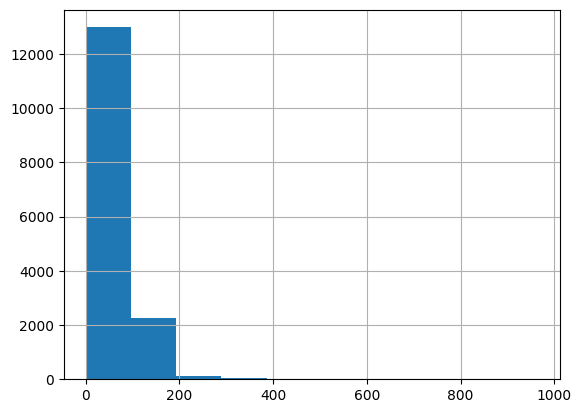

In [98]:
data['AQI Value'].hist()

This histogram represent the data distribute is right skew and not the bell shape 

`Caculate 1 standard deviation of the mean`

In [99]:
aqi_mean = data['AQI Value'].mean()
aqi_mean

61.68724093264249

In [100]:
aqi_std = data['AQI Value'].std()
aqi_std

48.524208266646646

### Use the empirical rule

`68% of the data fall within 1 standard deviation of the mean`

`95% of the data fall within 2 standard deviations of the mean`

`99.7% of the data fall within 3 standard deviations of the mean`

In [101]:
lower_limit_1 = aqi_mean - aqi_std
upper_limit_1 = aqi_mean + aqi_std
print(lower_limit_1)
print(upper_limit_1)

13.163032665995843
110.21144919928913


Caculate percentage of data falls within 1 standard deviation of the mean

In [102]:
((data['AQI Value']>=lower_limit_1) & (data['AQI Value']<=upper_limit_1)).mean()

0.8074481865284974

there is a huge gap between reality and the empirical (68 <> 80)

Caculate percentage of data fall within 2 standard deviation of the mean

In [103]:
lower_limit_2 = aqi_mean - 2*aqi_mean
upper_limit_2 = aqi_mean + 2*aqi_mean

((data['AQI Value']>=lower_limit_2) & (data['AQI Value']<=upper_limit_2)).mean()

0.9856865284974093

**98 <>95** one more difference

Caculate percentage of data fall within 3 standard deviation of the mean

In [104]:
lower_limit_3 = aqi_mean - 3*aqi_mean
upper_limit_3 = aqi_mean + 3*aqi_mean

((data['AQI Value']>=lower_limit_3) & (data['AQI Value']<=upper_limit_3)).mean()

0.992940414507772

this time there is no difference but it is not meaningful because the previous 2 results have shown that this data set is not empirical rule

althought data set not empirical rule but i want to caculate z-score 

In [105]:
data['z-score'] = stats.zscore(data['AQI Value'])
data.head()

,Date,Country,Status,AQI Value,z-score
0,2022-07-21,Albania,Good,14,-0.982783
1,2022-07-21,Algeria,Moderate,65,0.068272
2,2022-07-21,Andorra,Moderate,55,-0.137817
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113,1.057501
4,2022-07-21,Argentina,Moderate,63,0.027055


Find outlier 

In [106]:
data[(data['z-score']>3) | (data['z-score']<-3)]

,Date,Country,Status,AQI Value,z-score
61,2022-07-21,Iran,Very Unhealthy,250,3.880926
62,2022-07-21,Iraq,Very Unhealthy,234,3.551183
112,2022-07-21,Saudi Arabia,Very Unhealthy,272,4.334323
169,2022-07-21,Chile,Very Unhealthy,212,3.097786
203,2022-07-21,Iran,Very Unhealthy,246,3.798490
...,...,...,...,...,...
14447,2024-08-15,Chile,Very Unhealthy,262,4.128233
14697,2024-08-29,Brazil,Very Unhealthy,248,3.839708
15060,2024-09-12,USA,Hazardous,328,5.488423
15190,2024-09-19,Uzbekistan,Hazardous,500,9.033160


`List the country is air quality worest`

In [107]:
data['Country'][data['z-score'] > 3].unique()

array(['Iran', 'Iraq', 'Saudi Arabia', 'Chile', 'India', 'Gabon',
       'Gibraltar', 'United Arab Emirates', 'Ethiopia', 'Burkina Faso',
       'Zambia', 'Kuwait', 'Gambia', 'France', 'Nepal', 'Turkey', 'China',
       'USA', 'Central African Republic', 'Myanmar', 'Thailand', 'Laos',
       'South Korea', 'Chad', 'Senegal', 'Egypt', 'Kazakhstan', 'Belgium',
       'Germany', 'Netherlands', 'Great Britain', 'Mexico', 'Togo',
       'Cape Verde', 'Kyrgyzstan', 'Tajikistan', 'Brazil', 'Canada',
       'Uzbekistan'], dtype=object)

In [108]:
data_2022 = data[data['Date'].dt.year == 2022] 
high_zscore_countries_2022 = data_2022['Country'][data_2022['z-score'] > 3].unique()
high_zscore_countries_2022

array(['Iran', 'Iraq', 'Saudi Arabia', 'Chile', 'India', 'Gabon',
       'Gibraltar', 'United Arab Emirates', 'Ethiopia', 'Burkina Faso',
       'Zambia', 'Kuwait', 'Gambia', 'France', 'Nepal', 'Turkey', 'China',
       'USA'], dtype=object)

In [109]:
data['Year'] = data['Date'].dt.year
data.head()

,Date,Country,Status,AQI Value,z-score,Year
0,2022-07-21,Albania,Good,14,-0.982783,2022
1,2022-07-21,Algeria,Moderate,65,0.068272,2022
2,2022-07-21,Andorra,Moderate,55,-0.137817,2022
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113,1.057501,2022
4,2022-07-21,Argentina,Moderate,63,0.027055,2022


In [110]:
filtered_data = data[data['Country'].isin(high_zscore_countries_2022)]
grouped_data = filtered_data.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
print(grouped_data.head())

   Year       Country   AQI Value
0  2022  Burkina Faso   67.802817
1  2022         Chile  105.915493
2  2022         China  156.647887
3  2022      Ethiopia  159.281690
4  2022        France   61.591549


### Visualize countrys have bad quality begin 2022 and tracking them over subsequent years

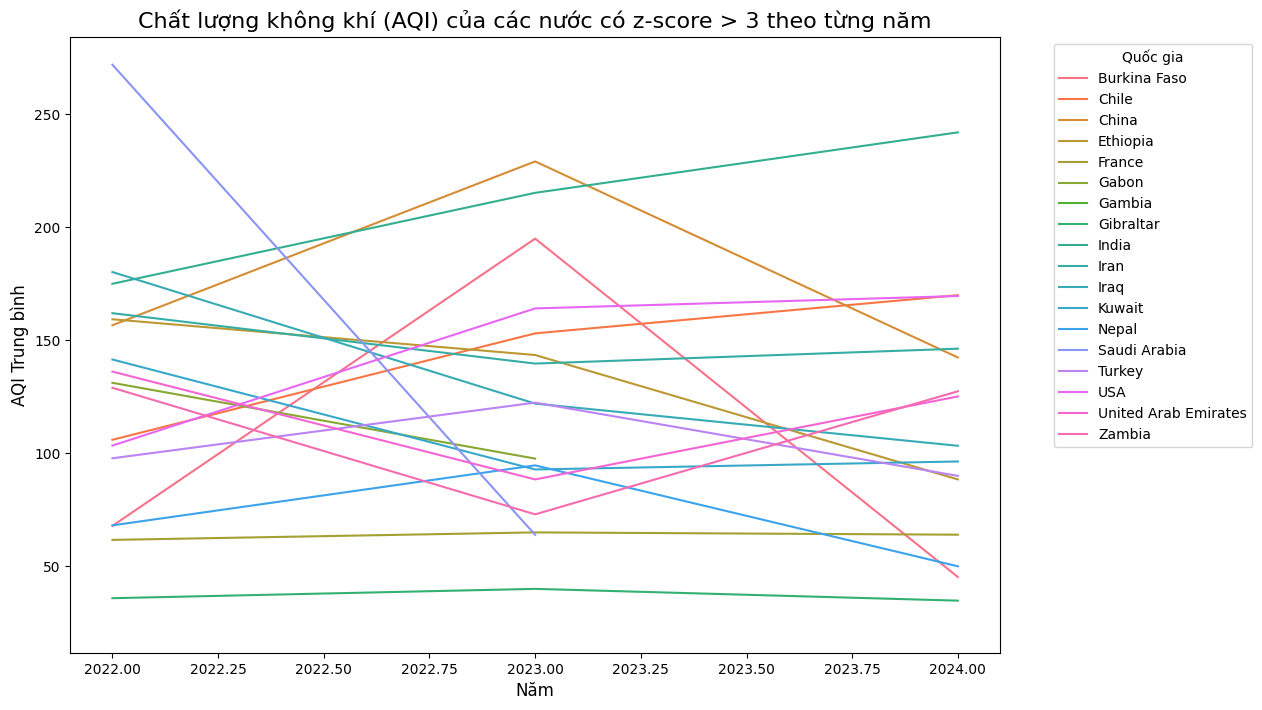

In [111]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='Year', y='AQI Value', hue='Country')
plt.title('Chất lượng không khí (AQI) của các nước có z-score > 3 theo từng năm', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('AQI Trung bình', fontsize=12)
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Refer visualize in kaggle ^^

Soure [link](https://www.kaggle.com/code/bharat04/aqi-air-quality-eda-datetime-plotly-visualization)

It is interesting

This is skill issue !!!

In [112]:
plt.figure(figsize=(25,20))
px.bar(data, x = "AQI Value", y="Country", color="Status", animation_frame= "Date", width=1200 ,height=1000)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Status=Good<br>Date=2022-07-21' ... 'br>Country=%{y}<extra></extra>'),
              'legendgroup': 'Good',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Good',
              'offsetgroup': 'Good',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([14, 45, 12, 13, 28, 12,  9, 15, 28, 15, 43,  6, 25, 33, 50, 36, 26, 15,
                          25, 13,  9, 41, 34, 38,  3,  7,  1, 47, 47, 30,  8, 14, 38, 29, 27, 40,
                          38, 42, 20, 23, 20, 32, 42, 30, 46, 42, 25, 16, 46, 42, 46, 15, 18, 26,
                           8, 14, 50, 33, 29, 49, 42, 38, 31, 20, 37,  3, 43, 39, 17, 48, 18, 12,
                          29,  9, 10, 15, 29, 15, 44,  8, 24, 34, 36, 25, 16, 25, 13,  5, 41, 34,
                          32,  3,  7,  1, 32,  9, 15, 30, 28, 28, 42, 45, 44, 30, 24,  8, 19, 29,
                          46, 38, 49, 36, 25, 18, 44, 40, 44, 36, 12, 30, 22,  6, 24, 50, 33, 21,
                          50, 45, 41, 32, 18, 26,  2, 41], dtype=int64),
              'xaxis': 'x',
              'y': array(['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belize', 'Bermuda',
                          'Bolivia', 'Brunei', 'Bulgaria', 'Cambodia', 'Cape Verde',
                          'Cayman Islands', 'Costa Rica', 'Croatia', 'Cyprus', 'Denmark',
                          'Dominican Republic', 'Estonia', 'Finland', 'French Guiana', 'Gambia',
                          'Georgia', 'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
                          'Guatemala', 'Honduras', 'Hong Kong', 'Iceland', 'Ireland',
                          'Ivory Coast', 'Jersey', 'Jordan', 'Kenya', 'Kosovo', 'Kyrgyzstan',
                          'Laos', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
                          'Macedonia', 'Madagascar', 'Martinique', 'Moldova', 'Monaco',
                          'Montenegro', 'Myanmar', 'New Caledonia', 'New Zealand', 'Portugal',
                          'Puerto Rico', 'Reunion', 'San Marino', 'Senegal', 'Singapore',
                          'Slovenia', 'Sri Lanka', 'Sweden', 'Switzerland', 'Trinidad and Tobago',
                          'Ukraine', 'Venezuela', 'Vietnam', 'Zambia', 'Albania', 'Austria',
                          'Azerbaijan', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brunei',
                          'Bulgaria', 'Cambodia', 'Cape Verde', 'Cayman Islands', 'Costa Rica',
                          'Croatia', 'Denmark', 'Dominican Republic', 'Estonia', 'Finland',
                          'French Guiana', 'Gambia', 'Georgia', 'Gibraltar', 'Greece', 'Grenada',
                          'Guadeloupe', 'Guam', 'Hong Kong', 'Iceland', 'Ireland', 'Ivory Coast',
                          'Jersey', 'Jordan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Latvia',
                          'Liberia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
                          'Macedonia', 'Madagascar', 'Martinique', 'Moldova', 'Monaco',
                          'Mongolia', 'Montenegro', 'Myanmar', 'New Caledonia', 'New Zealand',
                          'Portugal', 'Puerto Rico', 'Reunion', 'San Marino', 'Senegal',
                          'Singapore', 'Slovenia', 'Sri Lanka', 'Sweden', 'Switzerland',
                          'Trinidad and Tobago', 'Ukraine', 'Venezuela', 'Vietnam'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Status=Moderate<br>Date=2022-0' ... 'br>Country=%{y}<extra></extra>'),
              'legendgroup': 'Moderate',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Moderate',
              'offsetgroup': 'Moderate',
              'orientation': 'h',
              'showlegend': 

<Figure size 2500x2000 with 0 Axes>

In [115]:
fig = px.choropleth(data,locations = "Country", locationmode='country names', color="AQI Value", animation_frame="Date",range_color= [25,450])
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed